In [93]:
# CSVをDataFrameとして読み込み
df_red = pd.read_csv('winequality-red.csv')

# qualityの種類を確認
print('quality', np.unique(df_red['quality']))

# 全特徴量のカウント
print(len(df_red))

# 欠損値の確認
df_red.isnull().sum()

quality [3 4 5 6 7 8]
1599


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [94]:
# wine_allの先頭５行を確認
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [95]:
df_red.info()
print(df_red['quality'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


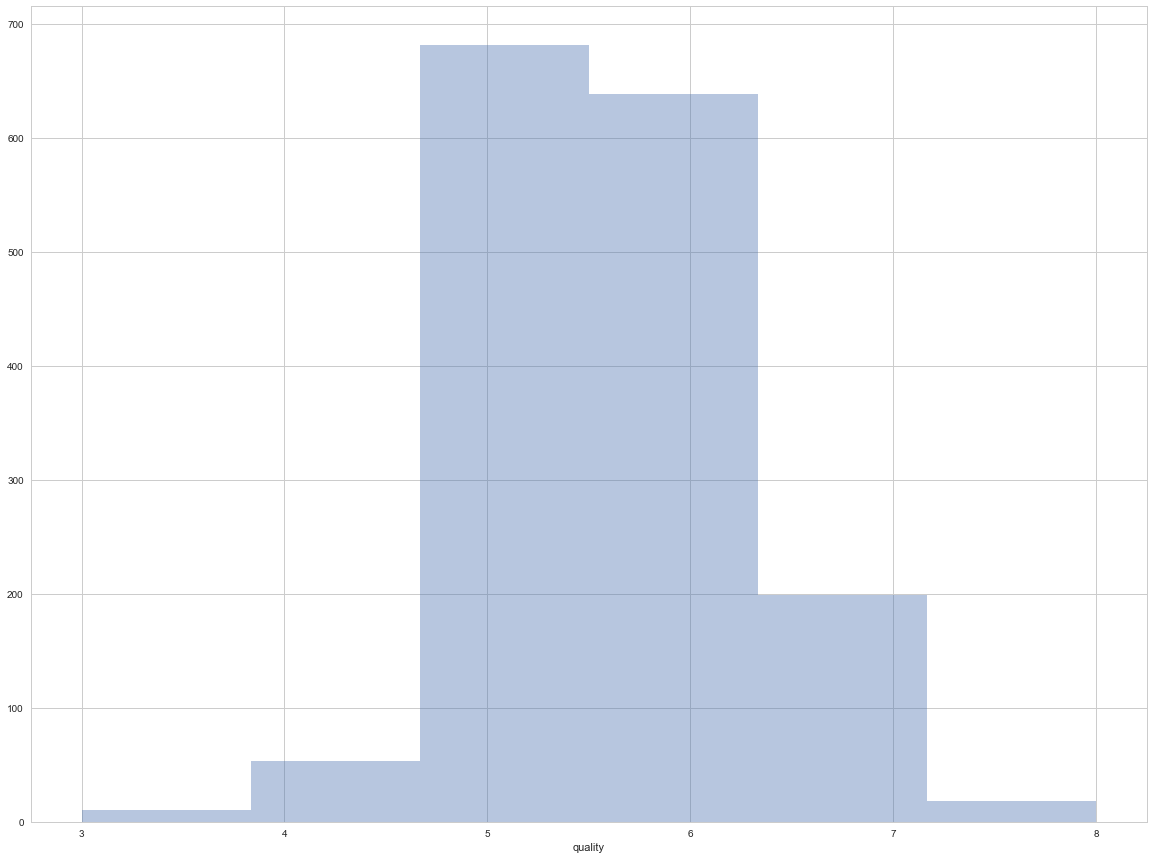

In [96]:
# data_allのqualityの出現率をヒストグラムで可視化する
plt.subplots(figsize=(20,15))
sns.distplot(df_red.quality, rug = False, kde = False, bins=6)
df_red['quality'].value_counts(sort=True, ascending=True)

plt.show()

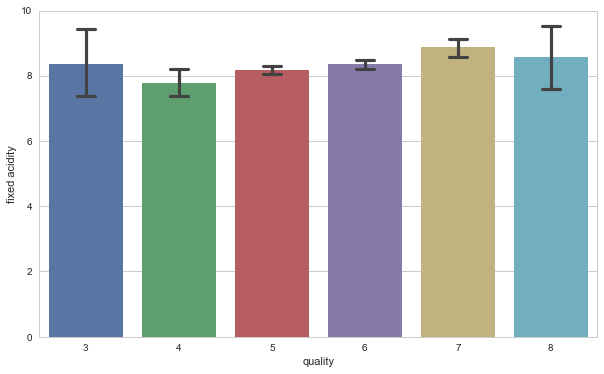

In [97]:
# それぞれの特徴量とqualityとの関係をbarplotで表示する
# 1. fixed acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df_red, capsize=.2)

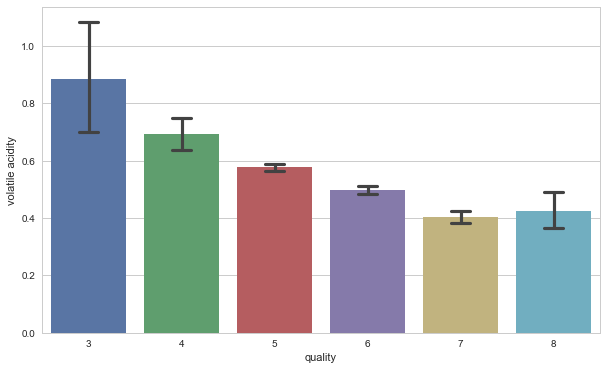

In [98]:
# 2.volatile acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df_red, capsize=.2)

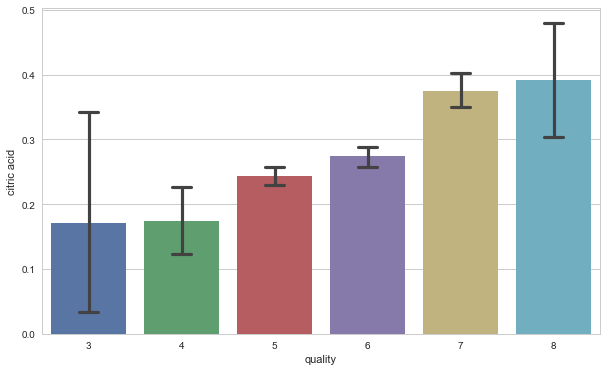

In [99]:
# 3.citric acid
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df_red, capsize=.2)

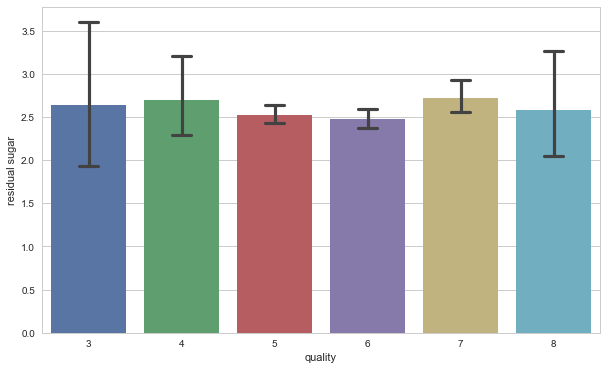

In [100]:
# 4.residual sugar
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df_red, capsize=.2)

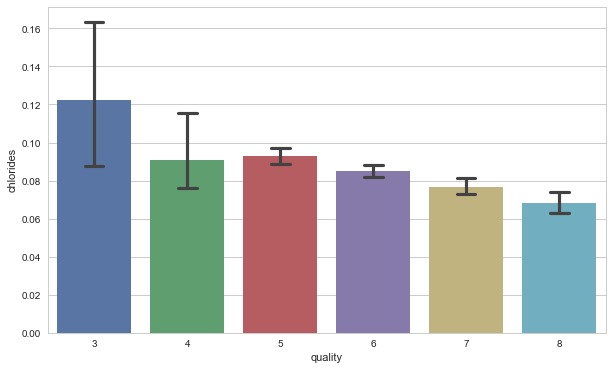

In [101]:
# 5.chlorides
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df_red, capsize=.2)

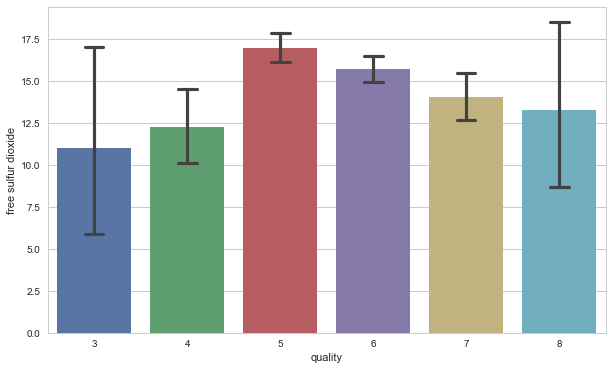

In [102]:
# 6.free sulfur dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df_red, capsize=.2)

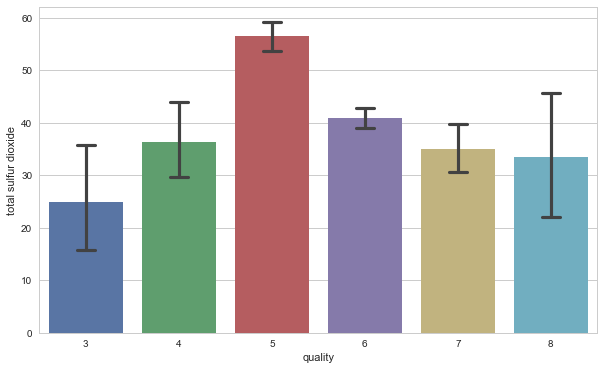

In [103]:
# 7.total sulfur dioxide 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df_red, capsize=.2)

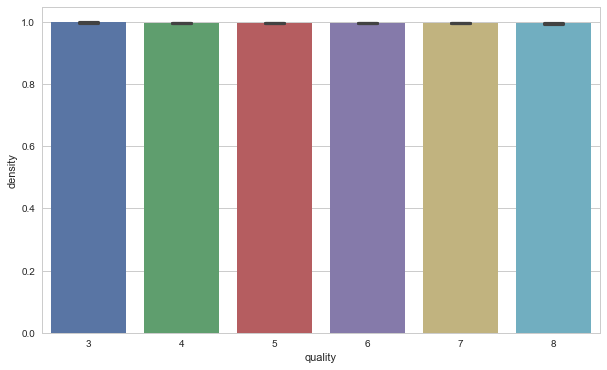

In [104]:
# 8.density
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = df_red, capsize=.2)

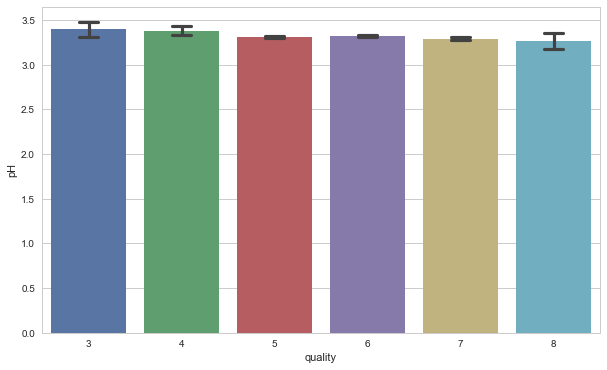

In [105]:
# 9.pH
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = df_red, capsize=.2)

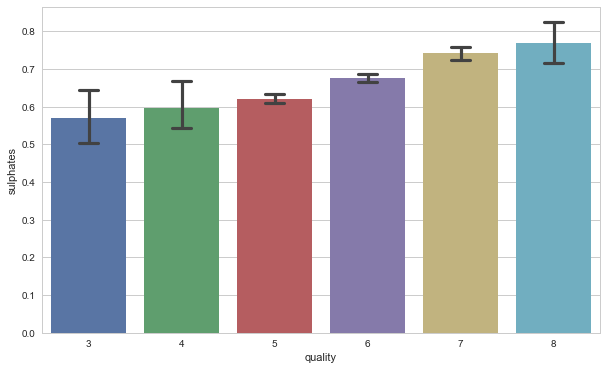

In [106]:
# 10.sulphates
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df_red, capsize=.2)

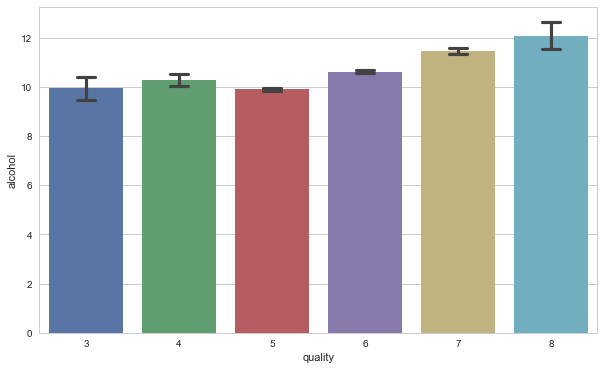

In [107]:
# 11.alcohol
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df_red, capsize=.2)

### Barplot Result
#### Top5 Average difference
2.volatile acidity
3.citric acid
5.chlorides
10.sulphates
11.alcohol

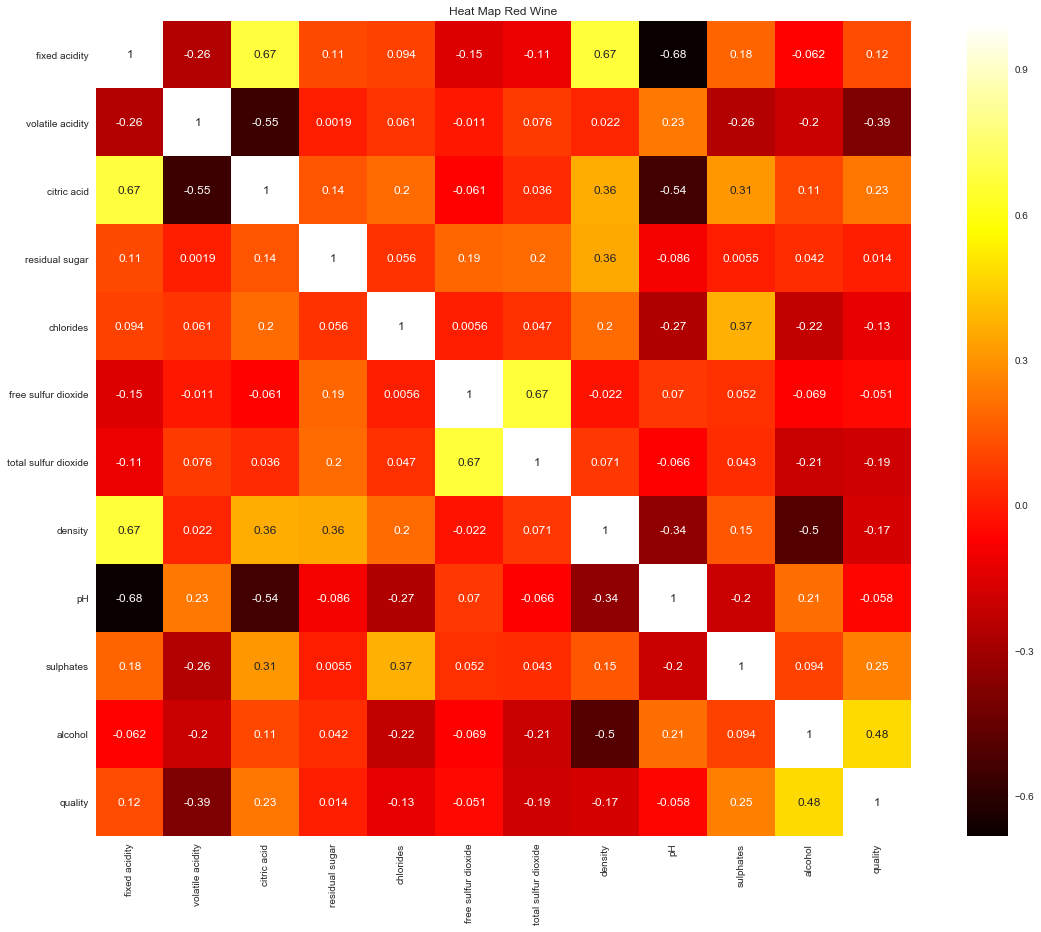

In [108]:
# df_redの相関強度をヒートマップを可視化
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Heat Map Red Wine")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, 
            square=True,
            cmap="hot")

### Heat map Result
#### Top5 Correlation Strength
1. alcohol
2. sulphates
3. citric acid
4. fixed acidity
5. residual sugur

## Data Preprocessing
1. Split "good" and "bad" wine with 
2. Split "train" and "test" data

In [159]:
from sklearn.model_selection import train_test_split
X, y = df_red.drop('quality', axis = 1), df_red.iloc[:, -1].values
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [160]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
# Split "good" and "bad" wine
y = np.asarray([1 if  i >= 7 else 0 for i in y])
y_label = np.asarray(['good' if  i>=1 else 'bad' for i in y])

X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print("Training Samples: {}".format(X_train.shape[0]))
print("Test Samples: {}".format(X_test.shape[0]))
# 層化サンプリングの確認
print("Qulity counts in y: ", np.bincount(y))
print("Qulity counts in y_train:", np.bincount(y_train))
print("Qulity counts in y_test:", np.bincount(y_test))

Training Samples: 1279
Test Samples: 320
Qulity counts in y:  [1382  217]
Qulity counts in y_train: [1105  174]
Qulity counts in y_test: [277  43]


In [161]:
# 1. Multiple Linear Regression
from sklearn import linear_model
clf1 = linear_model.LinearRegression().fit(X_train, y_train)

# print(clf1.intercept_)
print("Train Accuracy: %.3f"% clf1.score(X_train,y_train))
print("Test Accuracy: %.3f"% clf1.score(X_test,y_test))

Train Accuracy: 0.243
Test Accuracy: 0.241


In [162]:
# 2. Logistic Linear
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(C=100, random_state=100).fit(X_train,y_train)

print("Train Accuracy: %.3f"% clf2.score(X_train,y_train))
print("Test Accuracy: %.3f"% clf2.score(X_test,y_test))

Train Accuracy: 0.888
Test Accuracy: 0.866


 1) alcohol                        0.163132
 2) sulphates                      0.130946
 3) volatile acidity               0.114452
 4) density                        0.091209
 5) total sulfur dioxide           0.085321
 6) citric acid                    0.081399
 7) fixed acidity                  0.072153
 8) chlorides                      0.070709
 9) residual sugar                 0.067825
10) pH                             0.061526
11) free sulfur dioxide            0.061327
Train Accuracy: 1.000
Test Accuracy: 0.912


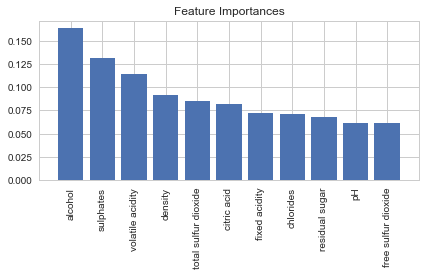

In [164]:
# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier
feat_label = df_red.columns[0:]
clf3 = RandomForestClassifier(n_estimators=500,
                              random_state=100,
                              n_jobs=-1).fit(X_train, y_train)

importances = clf3.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %
          (f + 1, 30, feat_label[indices[f]], importances[indices[f]]))
print("Train Accuracy: %.3f"% clf3.score(X_train,y_train))
print("Test Accuracy: %.3f"% clf3.score(X_test,y_test))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_label[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [167]:
# cross-varidation
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(random_state=100))

params = { "randomforestclassifier__n_estimators" : [1, 50, 100, 200, 300, 400, 500], 
           "randomforestclassifier__max_features" : ['auto', 'sqrt', 'log2'],
           "randomforestclassifier__max_depth": [None, 5, 3, 1]}

clf4 = GridSearchCV(pipeline, params, cv=10)
clf4 = clf4.fit(X_train, y_train)

print(clf4.best_score_)
print(clf4.best_params_)
pred = clf4.predict(X_test)

print(confusion_matrix(y_test, pred, labels=[0,1]))
print("Precision : %.3f"% precision_score(y_test, pred, average="micro"))
print ("Recall: %.3f"% recall_score(y_test, pred, average="micro"))
print ("F1: %.3f"% f1_score(y_test, pred, average="micro"))
print("Final Accuracy: %.3f"% accuracy_score(y_test, pred))

0.9038311180609852
{'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__n_estimators': 100}
[[267  10]
 [ 22  21]]
Precision : 0.900
Recall: 0.900
F1: 0.900
Final Accuracy: 0.900
